In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_data = pd.read_csv("/Users/pmzff/Documents/GitHub/ModularCircFF/ExploreModularCirc/Outputs/Output_2000/pressure_traces/all_pressure_traces.csv")
X_data.head()


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,CO,dt,EF
0,17.123672,17.039140,16.954551,16.869956,16.785397,16.700913,16.616540,16.535916,16.700922,17.498702,...,17.447459,17.365425,17.282968,17.200149,17.117035,17.033691,16.950181,3.764469,0.005745,0.346194
1,35.562224,35.426387,35.291060,35.156039,35.021345,34.887150,34.753321,34.619835,34.486833,34.354241,...,36.735991,36.596742,36.458007,36.319395,36.181126,36.043379,35.905861,2.434115,0.007686,0.251003
2,34.704787,34.430315,34.157593,33.886647,33.617495,33.350158,33.084652,32.820992,32.559192,32.299974,...,36.887992,36.599396,36.312396,36.027031,35.743335,35.461341,35.181080,2.835045,0.008542,0.299033
3,30.160207,30.113348,30.067016,30.020510,29.973421,29.926252,29.879543,29.833041,29.786201,29.739080,...,30.349924,30.303584,30.256976,30.211046,30.165358,30.118966,30.071976,3.332913,0.004827,0.340933
4,33.587991,33.516326,33.444725,33.373203,33.301748,33.230365,33.159070,33.087860,33.016732,33.048636,...,34.160937,34.088687,34.016492,33.944340,33.872211,33.800141,33.728136,3.099857,0.006301,0.428617


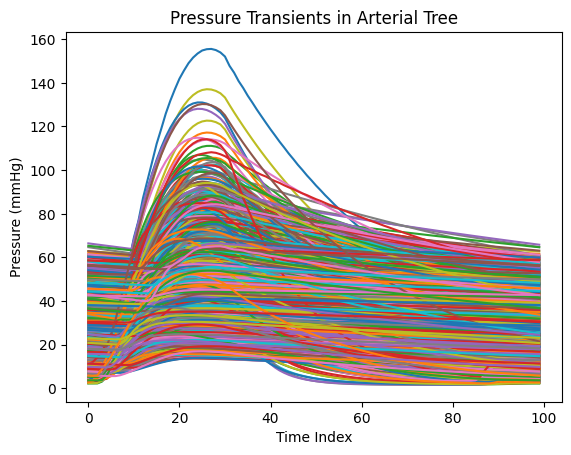

In [16]:
import matplotlib.pyplot as plt

# Initialize the plot
fig, ax = plt.subplots()

for ind in range(len(X_data)): 
    t = range(100) # Time adjustment
    p_pat = X_data.iloc[ind, :100].values # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

### Conduct PCA

In [59]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


## Standard PCA

## Select traces only 
X = X_data.iloc[:,:100].copy() # traces only

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it - standardize
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index=X_data.index)



kernel_pca = KernelPCA(n_components=10, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
X_kernel_pca = kernel_pca.fit_transform(X_scaled)

# Convert to dataframe
component_names_kernel = [f"PC{i+1}" for i in range(X_kernel_pca.shape[1])]
X_kernel_pca = pd.DataFrame(X_kernel_pca, columns=component_names_kernel, index=X_data.index)






In [60]:
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-10.908335,-0.858812,-0.414240,-0.146376,0.122053,0.044310,-0.066740,-0.020161,0.001032,-0.002944
1,2.591953,-1.376272,-0.822479,0.557091,-0.342148,0.093257,0.097762,-0.106239,0.021075,0.029356
2,6.699725,2.006736,-1.826862,0.239693,0.274333,-0.125086,-0.016128,-0.066118,0.069379,0.034097
3,-3.213316,-2.101681,0.299869,0.011689,0.065721,-0.036266,-0.032420,0.056723,-0.007645,-0.011117
4,-0.046848,-1.716650,0.426213,-0.213646,0.130159,0.029944,-0.092271,0.015619,0.053533,-0.000471


In [61]:
X_kernel_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.007117,-0.004364,-0.000034,-0.004596,-0.011341,-0.011767,-0.003153,-0.000748,-0.000935,-0.001399
1,-0.006578,-0.003917,-0.000030,-0.004083,-0.009965,-0.010010,-0.002630,-0.000608,-0.000673,-0.000981
2,-0.006258,-0.003685,-0.000028,-0.003828,-0.009313,-0.009282,-0.002429,-0.000560,-0.000612,-0.000891
3,-0.014264,-0.012436,0.000650,-0.014597,-0.046383,0.015162,-0.006362,-0.002719,-0.049304,0.239250
4,-0.009706,-0.009465,0.010101,0.001534,-0.010543,-0.017521,-0.004754,-0.001267,-0.002325,-0.000208


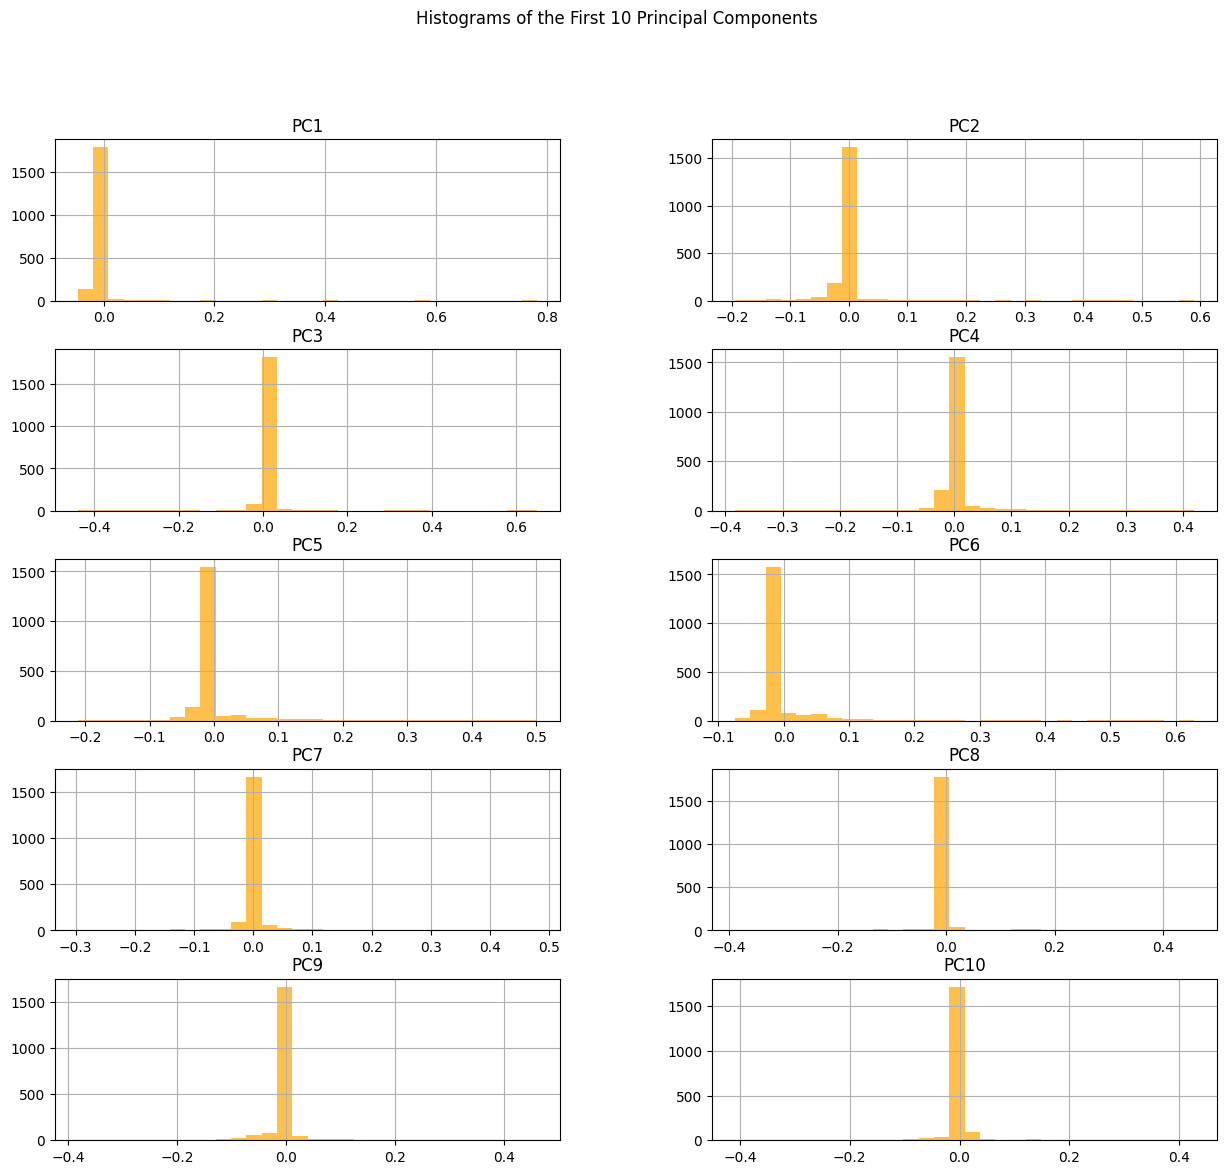

In [62]:
X_kernel_pca.hist(bins=30, figsize=(15, 13), layout=(5, 2), alpha=0.7, color='orange')
plt.suptitle('Histograms of the First 10 Principal Components')
plt.show()

In [69]:

explained_variance = np.var(X_kernel_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(explained_variance_ratio)
print(f'Cum Sum: {np.cumsum(explained_variance_ratio)}')

PC1     0.132789
PC2     0.112281
PC3     0.109095
PC4     0.107574
PC5     0.103550
PC6     0.095139
PC7     0.091665
PC8     0.088284
PC9     0.080270
PC10    0.079354
dtype: float64
Cum Sum: PC1     0.132789
PC2     0.245070
PC3     0.354165
PC4     0.461738
PC5     0.565288
PC6     0.660427
PC7     0.752092
PC8     0.840376
PC9     0.920646
PC10    1.000000
dtype: float64


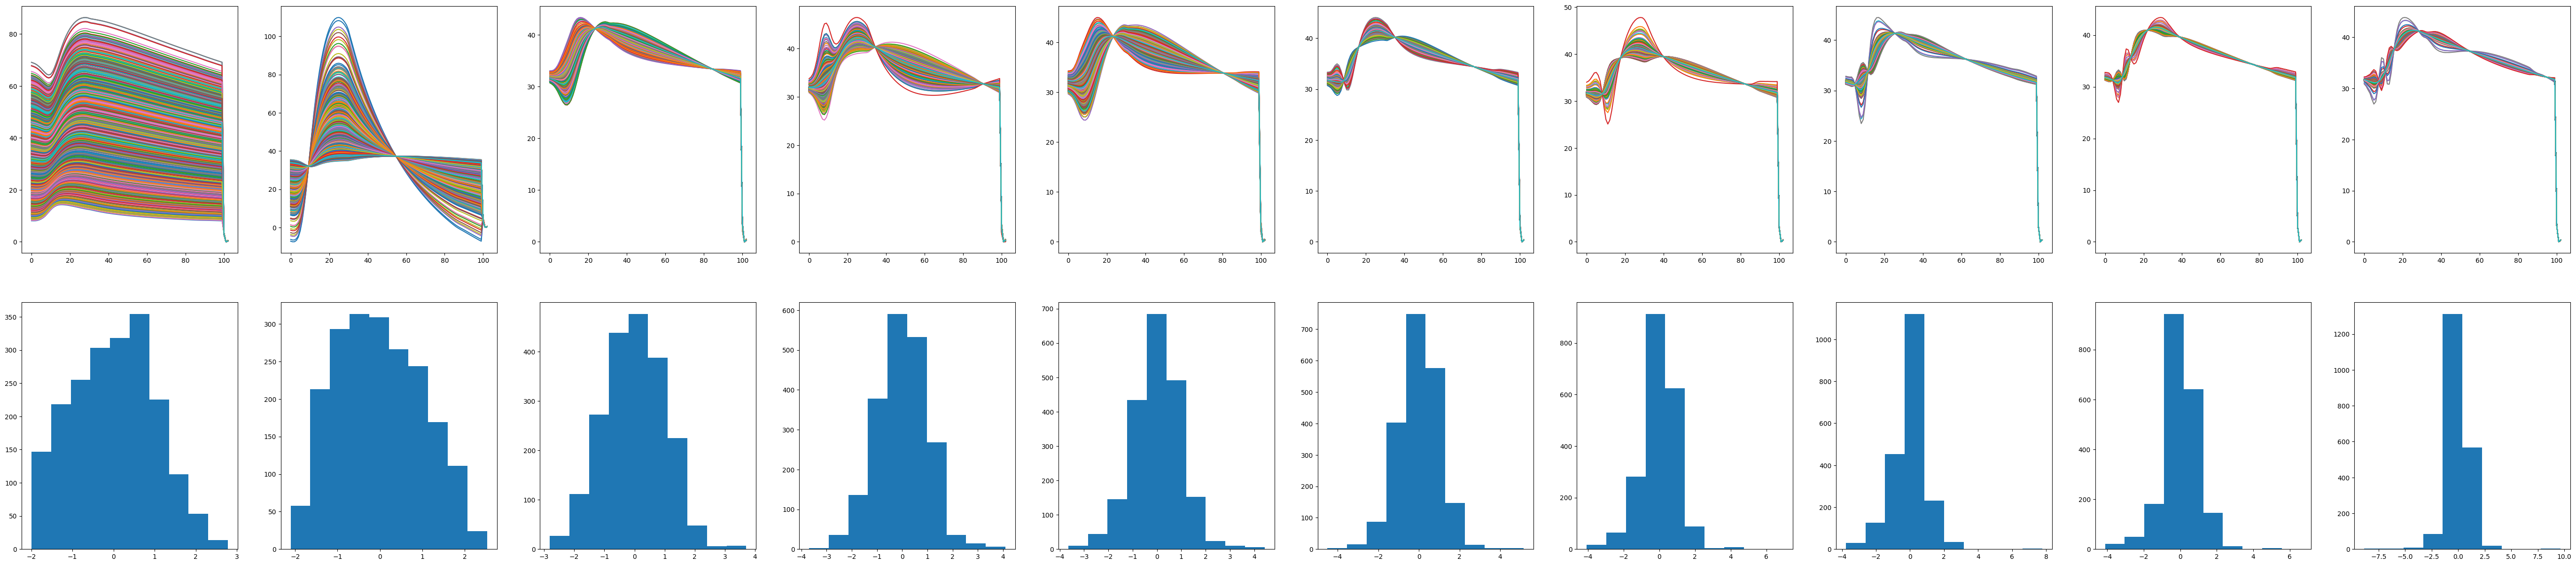

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  PowerTransformer
import numpy as np


pipeline = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('post',   PowerTransformer())
            ])

signals_pca = pipeline.fit_transform(X_data)

fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(70, 15))

for i in range(signals_pca.shape[1]):
    temp = np.zeros(signals_pca.shape)
    temp[:, i] = signals_pca[:, i]
    
    signals_new = pipeline.inverse_transform(temp)
    
    ax[1][i].hist(signals_pca[:,i], bins=10)
    for signal in signals_new:
        ax[0][i].plot(signal)
        
plt.show()